# Simulation of Double Pendulum

## Runge-Kutta Method

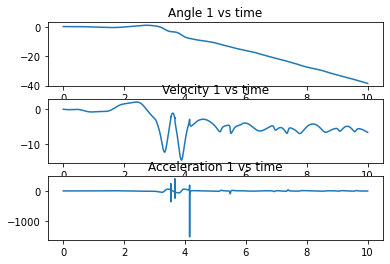

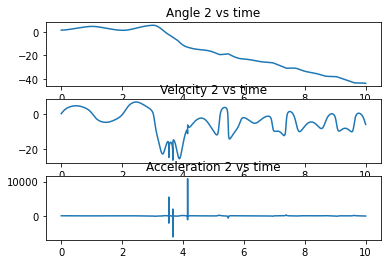

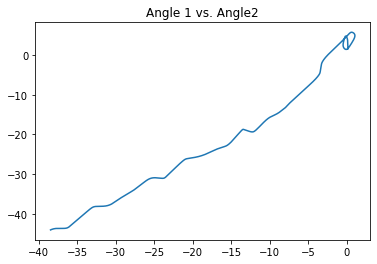

In [7]:
'''
Double Pendulum Simulation
Runge-Kutta Method
PHY-390: Indepedendent Study
'''

import numpy as np
import math
import matplotlib.pyplot as plt

#Definiton of variables

g = 9.8
len1 = 1.
len2 = 0.7
mass1 = 0.5
mass2 = 0.2

total_mass = mass1 + mass2
m2_l1_l2 = mass2*len1*len2


#Equations for elements A B C D E
        
A = mass1*(pow(len1,2)) + mass2*(pow(len1,2))
D = mass2*(pow(len2,2))

def B(angle_1, angle_2):

    dif_angles = angle_1 - angle_2
    B = m2_l1_l2*(np.cos(dif_angles))
    return B

def C(angle_1, angle_2, velocity_2):

    dif_angles = angle_1 - angle_2
    C = m2_l1_l2*(np.sin(dif_angles))*(pow(velocity_2,2)) + total_mass*g*len1*(np.sin(angle_1))
    return C

def E(angle_1, angle_2, velocity_1):

    dif_angles = angle_1 - angle_2
    E = mass2*g*len2*(np.sin(angle_2)) - (m2_l1_l2*(np.sin(dif_angles))*pow(velocity_1,2))
    return E

#Functions velocity and acceleration 

def theta_1dd(angle_1,angle_2,velocity_1, velocity_2):
    
    acceleration_1 = ((A*B(angle_1, angle_2)*E(angle_1, angle_2, velocity_1) - pow(B(angle_1, angle_2),2)*C(angle_1, angle_2, velocity_2)) / (pow(A,2)*D - A*B(angle_1, angle_2))) - (C(angle_1, angle_2, velocity_2)/A)
    return acceleration_1

def theta_2dd(angle_1,angle_2,velocity_1, velocity_2):

    acceleration_2 = (B(angle_1, angle_2)*C(angle_1, angle_2, velocity_2) + A*E(angle_1, angle_2, velocity_1)) / (D*A - B(angle_1, angle_2))
    return acceleration_2

def theta_1d(velocity_1):
    return velocity_1

def theta_2d(velocity_2):
    return velocity_2


def main():
    #Creation of time array

    time = 10
    number_points = 10000
    time_array = np.linspace(0, time, num=number_points)
    delta_t = time_array[1] - time_array[0]

    #Creation of angle, velocity and acceleration arrays
 
    angle1_array = np.zeros(number_points)
    angle2_array = np.zeros(number_points)

    velocity1_array = np.zeros(number_points)
    velocity2_array = np.zeros(number_points)

    acceleration1_array = np.zeros(number_points)
    acceleration2_array = np.zeros(number_points)

    #Initial angle, velocity and acceleration

    angle_1 = (math.pi)/18
    angle_2 = (math.pi)/2

    velocity_1 = velocity1_array[0]
    velocity_2 = velocity2_array[0]

    acceleration_1 = acceleration1_array[0]
    acceleration_2 = acceleration2_array[0]

    #K's for loop
    for i in range(number_points):

        #K1
        angle1_k1 = theta_1d(velocity_1)*delta_t
        velocity1_k1 = theta_1dd(angle_1,angle_2,velocity_1, velocity_2)*delta_t
        angle2_k1 = theta_2d(velocity_2)*delta_t
        velocity2_k1 = theta_2dd(angle_1,angle_2,velocity_1, velocity_2)*delta_t

        #K2
        angle1_k2 = theta_1d(velocity_1 + velocity1_k1/2)*delta_t
        velocity1_k2 = theta_1dd(angle_1 + angle1_k1/2,angle_2 + angle2_k1/2,velocity_1 + velocity1_k1/2 , velocity_2 + velocity2_k1/2)*delta_t
        angle2_k2 = theta_2d(velocity_2 + velocity2_k1/2)*delta_t
        velocity2_k2 = theta_2dd(angle_1 + angle1_k1/2,angle_2 + angle2_k1/2,velocity_1 + velocity1_k1/2 , velocity_2 + velocity2_k1/2)*delta_t

        #K3
        angle1_k3 = theta_1d(velocity_1 + velocity1_k2/2)*delta_t
        velocity1_k3 = theta_1dd(angle_1 + angle1_k2/2,angle_2 + angle2_k2/2,velocity_1 + velocity1_k2/2 , velocity_2 + velocity2_k2/2)*delta_t
        angle2_k3 = theta_2d(velocity_2 + velocity2_k2/2)*delta_t
        velocity2_k3 = theta_2dd(angle_1 + angle1_k2/2,angle_2 + angle2_k2/2,velocity_1 + velocity1_k2/2 , velocity_2 + velocity2_k2/2)*delta_t

        #K4
        angle1_k4 = theta_1d(velocity_1 + velocity1_k3)*delta_t
        velocity1_k4 = theta_1dd(angle_1 + angle1_k3,angle_2 + angle2_k3,velocity_1 + velocity1_k3 , velocity_2 + velocity2_k3)*delta_t
        angle2_k4 = theta_2d(velocity_2 + velocity2_k3)*delta_t
        velocity2_k4 = theta_2dd(angle_1 + angle1_k3,angle_2 + angle2_k3,velocity_1 + velocity1_k3, velocity_2 + velocity2_k3)*delta_t

        #Update values
        acceleration_1 = theta_1dd(angle_1,angle_2,velocity_1, velocity_2)
        acceleration1_array[i] = acceleration_1

        acceleration_2 = theta_2dd(angle_1,angle_2,velocity_1, velocity_2)
        acceleration2_array[i] = acceleration_2

        velocity_1 = velocity_1 + velocity1_k1/6 + velocity1_k2/3 + velocity1_k3/3 + velocity1_k4/6
        velocity1_array[i] = velocity_1

        velocity_2 = velocity_2 + velocity2_k1/6 + velocity2_k2/3 + velocity2_k3/3 + velocity2_k4/6
        velocity2_array[i] = velocity_2
        
        angle_1 = angle_1 + angle1_k1/6 + angle1_k2/3 + angle1_k3/3 + angle1_k4/6
        angle1_array[i] = angle_1

        angle_2 = angle_2 + angle2_k1/6 + angle2_k2/3 + angle2_k3/3 + angle2_k4/6
        angle2_array[i] = angle_2

    #print("Last time point is: " + str(time_array[-1]))
    #print("Last angle 1 point is: " + str(round(angle1_array[-1],5)))
    #print("Last angle 2 point is: " + str(round(angle2_array[-1],5)))
        
#Creation of plot figures

    fig1 = plt.figure()
    ax1a = fig1.add_subplot(311)
    ax1a.plot(time_array, angle1_array)
    ax1a.set_title("Angle 1 vs time")
    ax1b = fig1.add_subplot(312)
    ax1b.plot(time_array, velocity1_array)
    ax1b.set_title("Velocity 1 vs time")
    ax1c = fig1.add_subplot(313)
    ax1c.plot(time_array, acceleration1_array)
    ax1c.set_title("Acceleration 1 vs time")

    fig2 = plt.figure()
    ax2a = fig2.add_subplot(311)
    ax2a.plot(time_array, angle2_array)
    ax2a.set_title("Angle 2 vs time")
    ax2b = fig2.add_subplot(312)
    ax2b.plot(time_array, velocity2_array)
    ax2b.set_title("Velocity 2 vs time")
    ax2c = fig2.add_subplot(313)
    ax2c.plot(time_array, acceleration2_array)
    ax2c.set_title("Acceleration 2 vs time")

    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)
    ax3.plot(angle1_array, angle2_array)
    ax3.set_title("Angle 1 vs. Angle2")

    plt.show()
    
main()
